In [1]:
def reverse(data):
    return dict([(value, key) for (key, value) in data.items()])

In [2]:
def decode_review(word_index, data, index):
    return ' '.join([word_index.get(i - 3, '?') for i in data[index]])

In [3]:
def get_review(imdb, data, index):
    reverse_word_index = reverse(imdb.get_word_index())
    return decode_review(reverse_word_index, data, index)

In [4]:
import numpy as np

def one_hot_encoding(sequences, dimension):
    results = np.zeros(shape=(len(sequences), dimension), dtype=float)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
from keras import models
from keras import layers

def get_compiled_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(_NUM_WORDS,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy',  metrics=['accuracy'])
    return model

In [7]:
def run_model(train_data, train_labels, test_data, test_labels):
    model = get_compiled_model()
    model.fit(train_data, train_labels, epochs=4, batch_size=512, verbose=0)

    print("result: ", model.evaluate(test_data, test_labels))
    
    # show prediction samples
    # print("prediction for each test sample: ",model.predict(test_data))

In [8]:
def run_validation_model(train_data, train_labels, test_data, test_labels):
    model = get_compiled_model()

    # Validation
    # From the 25.000 samples we wanna use 10.000 as validation data
    NUM_VALIDATION = 10000
    validation_train_data = train_data[:NUM_VALIDATION]
    partial_train_data = train_data[NUM_VALIDATION:]

    validation_train_labels = train_labels[:NUM_VALIDATION]
    partial_train_labels = train_labels[NUM_VALIDATION:]

    # Run the training
    history = model.fit(partial_train_data, partial_train_labels,
                        epochs=20,
                        batch_size=512,
                        validation_data=(validation_train_data, validation_train_labels),
                        verbose=0)
    return history

In [9]:
def plot_loss_result(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    validation_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label="Loss Training")
    plt.plot(epochs, validation_loss_values, 'b', label='Loss Validation')
    plt.title('Loss function results')
    plt.xlabel('Epochs')
    plt.ylabel('Value loss function')
    plt.legend()

In [10]:
def plot_accuracy_result(history):
    history_dict = history.history
    acc_values = history_dict['acc']  
    validation_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)

    plt.figure()
    plt.plot(epochs, acc_values, 'bo', label='Accuracy Traning')
    plt.plot(epochs, validation_acc_values, 'b', label='Accuracy Validation')
    plt.title('Accuracy Results')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy value')
    plt.legend()

In [11]:
import matplotlib.pyplot as plt

def plot(history):
    plot_loss_result(history)
    plot_accuracy_result(history)

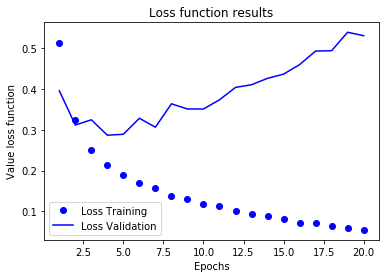

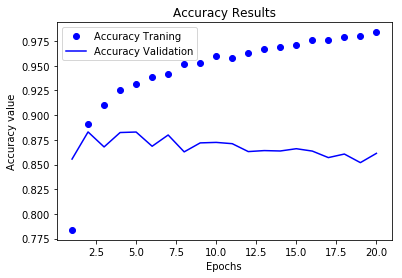

In [13]:
from keras.datasets import imdb

_NUM_WORDS=5000

(train_data, train_labels), (test_data, test_labels) =  imdb.load_data(num_words=_NUM_WORDS)

# print(get_review(imdb, train_data, 0))

binary_train_data = one_hot_encoding(train_data, _NUM_WORDS)
binary_test_data = one_hot_encoding(test_data, _NUM_WORDS)

binary_train_labels = np.asarray(train_labels).astype(float)
binary_test_labels = np.asarray(test_labels).astype(float)

history = run_validation_model(binary_train_data, binary_train_labels, binary_test_data, binary_test_labels)
plot(history)

# run_model(binary_train_data, binary_train_labels, binary_test_data, binary_test_labels)